In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

data_path = os.path.join('..', 'data', 'merged_data.csv')
merged_df = pd.read_csv(data_path)


In [2]:


# Select features and target
features = ["pts_reg", "asts_reg", "reb_reg", "stl_reg", "blk_reg", "fga_reg", "fta_reg", "tpa_reg"]
X = merged_df[features]
y = merged_df["is_all_star"]

# Handle missing values
X = X.fillna(X.median())

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9288


In [5]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)



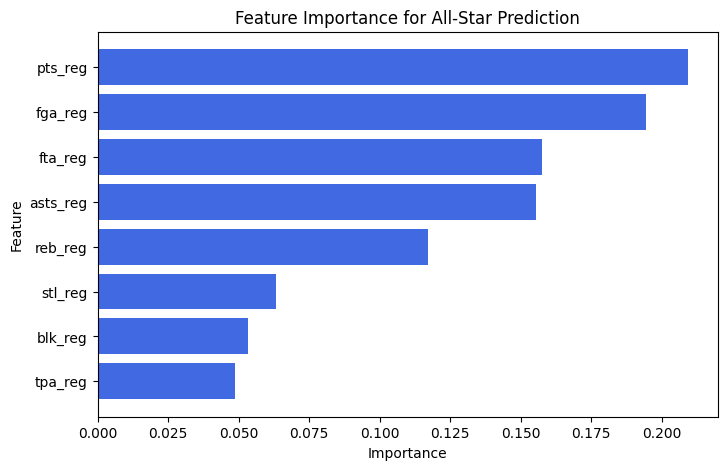

In [6]:
# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='royalblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for All-Star Prediction")
plt.gca().invert_yaxis()
plt.show()


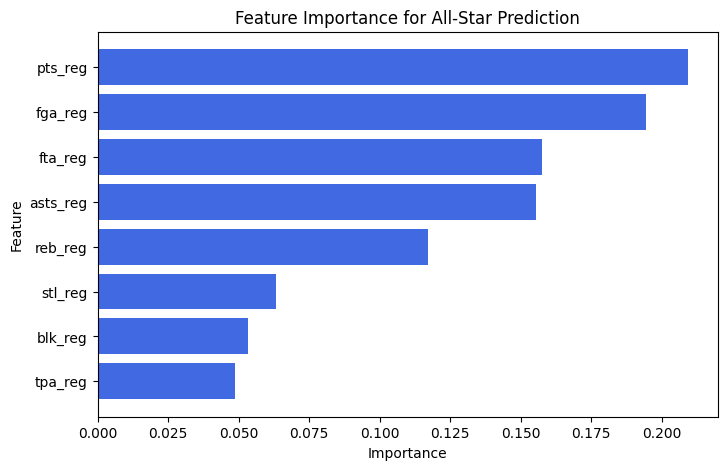

In [7]:
figures_path = os.path.join('..', 'figures')
os.makedirs(figures_path, exist_ok=True)

# Save feature importance chart
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='royalblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for All-Star Prediction")
plt.gca().invert_yaxis()

# Save the plot in the figures folder
plt.savefig(os.path.join(figures_path, "feature_importance_chart.png"))
plt.show()